# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [35]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [36]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [37]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [38]:
# The monthly amount for the member's household income
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [39]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [40]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(btc_response, indent=3)) 


{
   "data": {
      "1": {
         "id": 1,
         "name": "Bitcoin",
         "symbol": "BTC",
         "website_slug": "bitcoin",
         "rank": 1,
         "circulating_supply": 19093581,
         "total_supply": 19093581,
         "max_supply": 21000000,
         "quotes": {
            "USD": {
               "price": 20710.0,
               "volume_24h": 28085982446,
               "market_cap": 395246059031,
               "percentage_change_1h": 0.0841514473557188,
               "percentage_change_24h": 4.69296638211275,
               "percentage_change_7d": 0.698089879364508,
               "percent_change_1h": 0.0841514473557188,
               "percent_change_24h": 4.69296638211275,
               "percent_change_7d": 0.698089879364508
            }
         },
         "last_updated": 1657826343
      }
   },
   "metadata": {
      "timestamp": 1657826343,
      "num_cryptocurrencies": 3116,
      "error": null
   }
}


In [41]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
print(json.dumps(eth_response, indent=3)) 


{
   "data": {
      "1027": {
         "id": 1027,
         "name": "Ethereum",
         "symbol": "ETH",
         "website_slug": "ethereum",
         "rank": 2,
         "circulating_supply": 119680583,
         "total_supply": 119680583,
         "max_supply": 119680583,
         "quotes": {
            "USD": {
               "price": 1193.48,
               "volume_24h": 16184490957,
               "market_cap": 143051857626,
               "percentage_change_1h": -0.201458583330473,
               "percentage_change_24h": 9.85753933277788,
               "percentage_change_7d": 0.399851372582374,
               "percent_change_1h": -0.201458583330473,
               "percent_change_24h": 9.85753933277788,
               "percent_change_7d": 0.399851372582374
            }
         },
         "last_updated": 1657826342
      }
   },
   "metadata": {
      "timestamp": 1657826342,
      "num_cryptocurrencies": 3116,
      "error": null
   }
}


#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [42]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response["data"]["1"]["quotes"]["USD"]["price"]

# Print the current price of BTC
btc_price

20710.0

In [43]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response["data"]["1027"]["quotes"]["USD"]["price"]

# Print the current price of ETH
eth_price

1193.48

### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [44]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price

# Print current value of your holding in BTC
btc_value

24852.0

In [45]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price

# Print current value of your holding in ETH
eth_value


6325.4439999999995

In [46]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value

# Print current cryptocurrency wallet balance
total_crypto_wallet


31177.444

### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [47]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [48]:
# Set the variables for the Alpaca API and secret keys
APCA_API_KEY_ID = os.getenv("APCA_API_KEY_ID")
APCA_API_SECRET_KEY = os.getenv("APCA_API_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    APCA_API_KEY_ID,
    APCA_API_SECRET_KEY,
    api_version="v2")


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [125]:
# Set the tickers for both the bond and stock portion of the portfolio
ticker = ["SPY", "AGG"] 

# Set timeframe to 1Day
timeframe = "1D" 

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-09-07", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [126]:
# Use the Alpaca get_bars function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
df_portfolio = alpaca.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Review the first 5 rows of the Alpaca DataFrame
df_portfolio.head()


SPY                                        \
                             open      high       low   close    volume   
timestamp                                                                 
2020-08-07 04:00:00+00:00  333.29  334.8800  332.3000  334.57  57282821   
2020-08-10 04:00:00+00:00  335.00  335.7700  332.9550  335.57  46010808   
2020-08-11 04:00:00+00:00  336.86  337.5400  332.0100  332.80  69601087   
2020-08-12 04:00:00+00:00  335.47  338.2800  332.8377  337.44  53914841   
2020-08-13 04:00:00+00:00  336.58  338.2514  335.8300  336.83  41819943   

                                                      AGG                    \
                          trade_count        vwap    open     high      low   
timestamp                                                                     
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.730  119.395   
2020-08-10 04:00:00+00:00      284608  335.006397  119.62  119.635  119.280   
2020-08-11 04:00:00+00:00      385851  335.212188  119.11  119.210  118.840   
2020-08-12 04:00:00+00:00      312589  336.715356  118.73  118.890  118.650   
2020-08-13 04:00:00+00:00      278290  337.208390  118.77  118.780  118.240   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306  
2020-08-10 04:00:00+00:00  119.32  5152701       16680  119.403983  
2020-08-11 04:00:00+00:00  118.99  7809897       19839  118.963269  
2020-08-12 04:00:00+00:00  118.75  5524629       16150  118.765101  
2020-08-13 04:00:00+00:00  118.31  8024370       24612  118.442935

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [127]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = df_portfolio['AGG']['close']

# Print the AGG closing price
print(agg_close_price)

timestamp
2020-08-07 04:00:00+00:00    119.43
2020-08-10 04:00:00+00:00    119.32
2020-08-11 04:00:00+00:00    118.99
2020-08-12 04:00:00+00:00    118.75
2020-08-13 04:00:00+00:00    118.31
2020-08-14 04:00:00+00:00    118.20
2020-08-17 04:00:00+00:00    118.36
2020-08-18 04:00:00+00:00    118.53
2020-08-19 04:00:00+00:00    118.35
2020-08-20 04:00:00+00:00    118.56
2020-08-21 04:00:00+00:00    118.68
2020-08-24 04:00:00+00:00    118.63
2020-08-25 04:00:00+00:00    118.38
2020-08-26 04:00:00+00:00    118.36
2020-08-27 04:00:00+00:00    117.95
2020-08-28 04:00:00+00:00    118.11
2020-08-31 04:00:00+00:00    118.37
2020-09-01 04:00:00+00:00    118.42
2020-09-02 04:00:00+00:00    118.66
2020-09-03 04:00:00+00:00    118.69
2020-09-04 04:00:00+00:00    118.10
Name: close, dtype: float64


In [128]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = df_portfolio['SPY']['close']

# Print the SPY closing price
print(spy_close_price)


timestamp
2020-08-07 04:00:00+00:00    334.57
2020-08-10 04:00:00+00:00    335.57
2020-08-11 04:00:00+00:00    332.80
2020-08-12 04:00:00+00:00    337.44
2020-08-13 04:00:00+00:00    336.83
2020-08-14 04:00:00+00:00    336.84
2020-08-17 04:00:00+00:00    337.91
2020-08-18 04:00:00+00:00    338.64
2020-08-19 04:00:00+00:00    337.23
2020-08-20 04:00:00+00:00    338.28
2020-08-21 04:00:00+00:00    339.48
2020-08-24 04:00:00+00:00    342.92
2020-08-25 04:00:00+00:00    344.12
2020-08-26 04:00:00+00:00    347.57
2020-08-27 04:00:00+00:00    348.33
2020-08-28 04:00:00+00:00    350.58
2020-08-31 04:00:00+00:00    349.31
2020-09-01 04:00:00+00:00    352.60
2020-09-02 04:00:00+00:00    357.70
2020-09-03 04:00:00+00:00    345.39
2020-09-04 04:00:00+00:00    342.57
Name: close, dtype: float64


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [129]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Print the current value of the bond portfolio
agg_value


timestamp
2020-08-07 04:00:00+00:00    23886.0
2020-08-10 04:00:00+00:00    23864.0
2020-08-11 04:00:00+00:00    23798.0
2020-08-12 04:00:00+00:00    23750.0
2020-08-13 04:00:00+00:00    23662.0
2020-08-14 04:00:00+00:00    23640.0
2020-08-17 04:00:00+00:00    23672.0
2020-08-18 04:00:00+00:00    23706.0
2020-08-19 04:00:00+00:00    23670.0
2020-08-20 04:00:00+00:00    23712.0
2020-08-21 04:00:00+00:00    23736.0
2020-08-24 04:00:00+00:00    23726.0
2020-08-25 04:00:00+00:00    23676.0
2020-08-26 04:00:00+00:00    23672.0
2020-08-27 04:00:00+00:00    23590.0
2020-08-28 04:00:00+00:00    23622.0
2020-08-31 04:00:00+00:00    23674.0
2020-09-01 04:00:00+00:00    23684.0
2020-09-02 04:00:00+00:00    23732.0
2020-09-03 04:00:00+00:00    23738.0
2020-09-04 04:00:00+00:00    23620.0
Name: close, dtype: float64

In [130]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Print the current value of the stock portfolio
spy_value


timestamp
2020-08-07 04:00:00+00:00    36802.7
2020-08-10 04:00:00+00:00    36912.7
2020-08-11 04:00:00+00:00    36608.0
2020-08-12 04:00:00+00:00    37118.4
2020-08-13 04:00:00+00:00    37051.3
2020-08-14 04:00:00+00:00    37052.4
2020-08-17 04:00:00+00:00    37170.1
2020-08-18 04:00:00+00:00    37250.4
2020-08-19 04:00:00+00:00    37095.3
2020-08-20 04:00:00+00:00    37210.8
2020-08-21 04:00:00+00:00    37342.8
2020-08-24 04:00:00+00:00    37721.2
2020-08-25 04:00:00+00:00    37853.2
2020-08-26 04:00:00+00:00    38232.7
2020-08-27 04:00:00+00:00    38316.3
2020-08-28 04:00:00+00:00    38563.8
2020-08-31 04:00:00+00:00    38424.1
2020-09-01 04:00:00+00:00    38786.0
2020-09-02 04:00:00+00:00    39347.0
2020-09-03 04:00:00+00:00    37992.9
2020-09-04 04:00:00+00:00    37682.7
Name: close, dtype: float64

In [131]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
total_stocks_bonds


timestamp
2020-08-07 04:00:00+00:00    60688.7
2020-08-10 04:00:00+00:00    60776.7
2020-08-11 04:00:00+00:00    60406.0
2020-08-12 04:00:00+00:00    60868.4
2020-08-13 04:00:00+00:00    60713.3
2020-08-14 04:00:00+00:00    60692.4
2020-08-17 04:00:00+00:00    60842.1
2020-08-18 04:00:00+00:00    60956.4
2020-08-19 04:00:00+00:00    60765.3
2020-08-20 04:00:00+00:00    60922.8
2020-08-21 04:00:00+00:00    61078.8
2020-08-24 04:00:00+00:00    61447.2
2020-08-25 04:00:00+00:00    61529.2
2020-08-26 04:00:00+00:00    61904.7
2020-08-27 04:00:00+00:00    61906.3
2020-08-28 04:00:00+00:00    62185.8
2020-08-31 04:00:00+00:00    62098.1
2020-09-01 04:00:00+00:00    62470.0
2020-09-02 04:00:00+00:00    63079.0
2020-09-03 04:00:00+00:00    61730.9
2020-09-04 04:00:00+00:00    61302.7
Name: close, dtype: float64

In [132]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Print current cryptocurrency wallet balance
total_portfolio


timestamp
2020-08-07 04:00:00+00:00    91866.144
2020-08-10 04:00:00+00:00    91954.144
2020-08-11 04:00:00+00:00    91583.444
2020-08-12 04:00:00+00:00    92045.844
2020-08-13 04:00:00+00:00    91890.744
2020-08-14 04:00:00+00:00    91869.844
2020-08-17 04:00:00+00:00    92019.544
2020-08-18 04:00:00+00:00    92133.844
2020-08-19 04:00:00+00:00    91942.744
2020-08-20 04:00:00+00:00    92100.244
2020-08-21 04:00:00+00:00    92256.244
2020-08-24 04:00:00+00:00    92624.644
2020-08-25 04:00:00+00:00    92706.644
2020-08-26 04:00:00+00:00    93082.144
2020-08-27 04:00:00+00:00    93083.744
2020-08-28 04:00:00+00:00    93363.244
2020-08-31 04:00:00+00:00    93275.544
2020-09-01 04:00:00+00:00    93647.444
2020-09-02 04:00:00+00:00    94256.444
2020-09-03 04:00:00+00:00    92908.344
2020-09-04 04:00:00+00:00    92480.144
Name: close, dtype: float64

### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [152]:
# Consolidate financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
savings_data
    

[31177.444,
 timestamp
 2020-08-07 04:00:00+00:00    60688.7
 2020-08-10 04:00:00+00:00    60776.7
 2020-08-11 04:00:00+00:00    60406.0
 2020-08-12 04:00:00+00:00    60868.4
 2020-08-13 04:00:00+00:00    60713.3
 2020-08-14 04:00:00+00:00    60692.4
 2020-08-17 04:00:00+00:00    60842.1
 2020-08-18 04:00:00+00:00    60956.4
 2020-08-19 04:00:00+00:00    60765.3
 2020-08-20 04:00:00+00:00    60922.8
 2020-08-21 04:00:00+00:00    61078.8
 2020-08-24 04:00:00+00:00    61447.2
 2020-08-25 04:00:00+00:00    61529.2
 2020-08-26 04:00:00+00:00    61904.7
 2020-08-27 04:00:00+00:00    61906.3
 2020-08-28 04:00:00+00:00    62185.8
 2020-08-31 04:00:00+00:00    62098.1
 2020-09-01 04:00:00+00:00    62470.0
 2020-09-02 04:00:00+00:00    63079.0
 2020-09-03 04:00:00+00:00    61730.9
 2020-09-04 04:00:00+00:00    61302.7
 Name: close, dtype: float64]

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [137]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data)

# Display the savings_df DataFrame
savings_df


,0
0,31177.444
1,1288364.800


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

array([<AxesSubplot:ylabel='0'>], dtype=object)

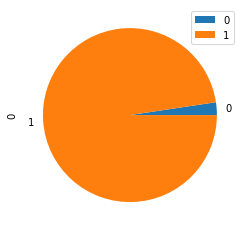

In [138]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(subplots = True)


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [139]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3


##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [142]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio >= emergency_fund_value:
    print('Congratulations you have enough money in this fund.')
elif total_portfolio == emergency_fund_value:
    print('Congratulations on reaching an important finacial goal!')
else total_portfolio <= emergency_fund_value:
    print(f"Im sorry but you are ${emergency_fund_value - total_portfolio} away")


SyntaxError: invalid syntax (3714721248.py, line 6)

## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [143]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
start = pd.Timestamp("2019-07-14", tz="America/New_York").isoformat()
end = pd.Timestamp("2022-07-14", tz="America/New_York").isoformat()

In [146]:
# Use the Alpaca get_bars function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
df_spy_agg = alpaca.get_bars(
    ticker,
    timeframe,
    start=start,
    end=end
).df


# Reorganize the DataFrame
# Separate ticker data
SPY = df_spy_agg[df_spy_agg['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_spy_agg[df_spy_agg['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_spy_agg = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Display both the first and last five rows of the DataFrame
display(df_spy_agg.head())
display(df_spy_agg.tail())


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  301.12  301.13  300.19  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.44  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.74  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.70  298.83  53567032   
2019-07-19 04:00:00+00:00  300.01  300.07  296.96  297.17  76794138   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2019-07-15 04:00:00+00:00      149900  300.605019  110.87  110.960  110.85   
2019-07-16 04:00:00+00:00      183816  300.108039  110.75  110.830  110.64   
2019-07-17 04:00:00+00:00      200151  298.543544  110.93  111.140  110.91   
2019-07-18 04:00:00+00:00      236661  298.067797  111.10  111.330  111.06   
2019-07-19 04:00:00+00:00      260715  298.617649  111.22  111.286  111.14   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-07-15 04:00:00+00:00  110.95  3619089       10885  110.925638  
2019-07-16 04:00:00+00:00  110.83  2149083       12676  110.743438  
2019-07-17 04:00:00+00:00  111.12  2985610       11771  111.066605  
2019-07-18 04:00:00+00:00  111.30  5982223       17331  111.220550  
2019-07-19 04:00:00+00:00  111.17  3150774        9948  111.225017

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2022-07-08 04:00:00+00:00  387.16  390.6400  385.660  388.67  72468892   
2022-07-11 04:00:00+00:00  385.91  386.8700  383.500  384.23  58100363   
2022-07-12 04:00:00+00:00  383.66  386.1600  378.990  380.83  62027220   
2022-07-13 04:00:00+00:00  375.09  381.9200  374.658  378.83  83575452   
2022-07-14 04:00:00+00:00  373.99  379.0498  371.040  377.91  86611271   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2022-07-08 04:00:00+00:00      509776  388.661805  101.35  101.4499  101.1600   
2022-07-11 04:00:00+00:00      473423  384.871994  101.67  101.9200  101.6029   
2022-07-12 04:00:00+00:00      512244  382.617620  102.02  102.1900  101.8200   
2022-07-13 04:00:00+00:00      671953  378.819688  101.23  102.2400  101.1900   
2022-07-14 04:00:00+00:00      634938  375.513841  101.51  101.9800  101.3300   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-07-08 04:00:00+00:00  101.23  5269814       19181  101.268556  
2022-07-11 04:00:00+00:00  101.70  5758310       17084  101.720884  
2022-07-12 04:00:00+00:00  101.84  6664991       21057  102.039440  
2022-07-13 04:00:00+00:00  102.21  6514247       26716  101.977478  
2022-07-14 04:00:00+00:00  101.85  6224484       24713  101.747121

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [147]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
MC_thirtyyear = MCSimulation(
    portfolio_data = df_spy_agg,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_thirtyyear.portfolio_data.head()


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  301.12  301.13  300.19  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.44  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.74  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.70  298.83  53567032   
2019-07-19 04:00:00+00:00  300.01  300.07  296.96  297.17  76794138   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00      149900  300.605019          NaN  110.87   
2019-07-16 04:00:00+00:00      183816  300.108039    -0.003458  110.75   
2019-07-17 04:00:00+00:00      200151  298.543544    -0.006573  110.93   
2019-07-18 04:00:00+00:00      236661  298.067797     0.003661  111.10   
2019-07-19 04:00:00+00:00      260715  298.617649    -0.005555  111.22   

                                                                         \
                              high     low   close   volume trade_count   
timestamp                                                                 
2019-07-15 04:00:00+00:00  110.960  110.85  110.95  3619089       10885   
2019-07-16 04:00:00+00:00  110.830  110.64  110.83  2149083       12676   
2019-07-17 04:00:00+00:00  111.140  110.91  111.12  2985610       11771   
2019-07-18 04:00:00+00:00  111.330  111.06  111.30  5982223       17331   
2019-07-19 04:00:00+00:00  111.286  111.14  111.17  3150774        9948   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  110.925638          NaN  
2019-07-16 04:00:00+00:00  110.743438    -0.001082  
2019-07-17 04:00:00+00:00  111.066605     0.002617  
2019-07-18 04:00:00+00:00  111.220550     0.001620  
2019-07-19 04:00:00+00:00  111.225017    -0.001168

In [148]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/alessandrovalentini/Desktop/financial_planning_tools/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991865,0.986204,0.996450,1.005120,0.990991,1.002674,0.995191,0.991897,1.002460,1.005733,...,0.976864,0.989342,1.008448,0.990355,1.011227,0.991352,1.006446,1.001413,1.000145,1.003534
2,0.998329,0.987966,0.997309,1.004497,0.987044,1.001026,1.011512,0.986292,0.995873,1.015629,...,0.973042,0.994204,0.993460,0.991953,0.996792,0.990794,1.014410,1.005848,0.993405,1.004173
3,0.996425,0.980284,0.995298,0.992395,0.985503,1.010476,1.010786,0.996602,0.997498,1.010286,...,0.965761,0.994126,0.972619,0.988947,1.001263,0.984271,1.008172,1.020752,0.991194,0.998395
4,0.983157,0.997191,1.001753,0.987125,0.986638,1.012774,1.007989,0.999981,0.991429,1.021084,...,0.962219,1.001497,0.971090,0.996347,1.000865,0.965468,1.010899,1.023617,0.977488,0.999302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.556104,1.690002,6.547434,6.250452,3.730021,2.897181,2.425728,4.191810,3.477460,3.676074,...,4.219083,17.619160,2.930828,13.112405,0.604154,3.970619,5.966925,6.937499,9.268412,5.330277
7557,0.563174,1.687045,6.540562,6.344885,3.744166,2.957859,2.423719,4.214244,3.504066,3.669718,...,4.230229,17.532555,2.967299,13.189879,0.601021,3.963839,5.978623,6.987974,9.386933,5.358451
7558,0.559134,1.672788,6.564054,6.344351,3.717661,2.895829,2.409259,4.245159,3.581991,3.655016,...,4.215754,17.444329,2.960573,13.260333,0.596317,3.926647,6.057603,6.973997,9.364632,5.440449
7559,0.565829,1.675039,6.570639,6.418082,3.726813,2.925485,2.425827,4.332655,3.546229,3.701507,...,4.254565,17.649522,2.978892,13.146670,0.599509,3.834702,6.030619,7.010881,9.281411,5.476995


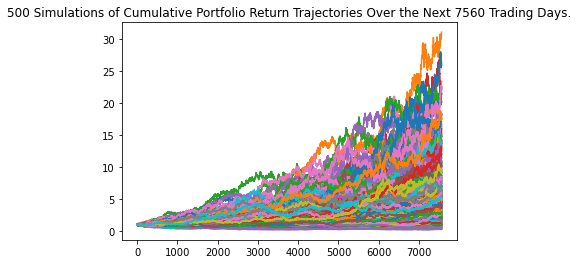

In [149]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_line_plot = MC_thirtyyear.plot_simulation()

MC_sim_line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

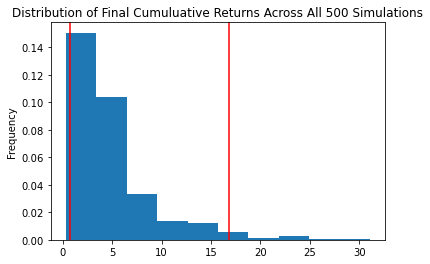

In [151]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_dist_plot = MC_thirtyyear.plot_distribution()

MC_sim_dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [153]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
MC_summary_statistics = MC_thirtyyear.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_summary_statistics)

count           500.000000
mean              4.915389
std               4.300073
min               0.308009
25%               2.106777
50%               3.750253
75%               6.044772
max              31.096633
95% CI Lower      0.749683
95% CI Upper     16.832883
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [160]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'This is the current balance of the stock and bond portion of the members portfolio: {total_portfolio.mean(): .2f}')


This is the current balance of the stock and bond portion of the members portfolio:  92528.15


In [159]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * 92528.15
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * 92528.15

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of $92,528.15 in the portfolio"
    f" over the next 30 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


There is a 95% chance that an initial investment of $92,528.15 in the portfolio over the next 30 years will end within in the range of $ 69366.75 and $ 1557515.49.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [161]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
MC_tenyear = MCSimulation(
    portfolio_data = df_spy_agg,
    weights = [.80,.20],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_tenyear.portfolio_data.head()


SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-15 04:00:00+00:00  301.12  301.13  300.19  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.44  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.74  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.70  298.83  53567032   
2019-07-19 04:00:00+00:00  300.01  300.07  296.96  297.17  76794138   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2019-07-15 04:00:00+00:00      149900  300.605019          NaN  110.87   
2019-07-16 04:00:00+00:00      183816  300.108039    -0.003458  110.75   
2019-07-17 04:00:00+00:00      200151  298.543544    -0.006573  110.93   
2019-07-18 04:00:00+00:00      236661  298.067797     0.003661  111.10   
2019-07-19 04:00:00+00:00      260715  298.617649    -0.005555  111.22   

                                                                         \
                              high     low   close   volume trade_count   
timestamp                                                                 
2019-07-15 04:00:00+00:00  110.960  110.85  110.95  3619089       10885   
2019-07-16 04:00:00+00:00  110.830  110.64  110.83  2149083       12676   
2019-07-17 04:00:00+00:00  111.140  110.91  111.12  2985610       11771   
2019-07-18 04:00:00+00:00  111.330  111.06  111.30  5982223       17331   
2019-07-19 04:00:00+00:00  111.286  111.14  111.17  3150774        9948   

                                                    
                                 vwap daily_return  
timestamp                                           
2019-07-15 04:00:00+00:00  110.925638          NaN  
2019-07-16 04:00:00+00:00  110.743438    -0.001082  
2019-07-17 04:00:00+00:00  111.066605     0.002617  
2019-07-18 04:00:00+00:00  111.220550     0.001620  
2019-07-19 04:00:00+00:00  111.225017    -0.001168

In [162]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/alessandrovalentini/Desktop/financial_planning_tools/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009750,0.987419,1.025970,1.002437,0.977272,0.988426,0.995500,0.979283,0.985999,0.999683,...,1.031643,0.998635,1.003177,1.006509,1.008623,0.997907,1.023133,1.013237,1.022184,0.986062
2,0.995956,1.017360,1.033044,0.999453,0.975825,1.007960,0.983134,0.976775,0.988164,1.005352,...,1.031909,1.020226,0.998879,1.005482,1.005982,1.018558,1.049515,1.022576,1.039347,0.995386
3,1.000032,1.008886,1.036772,0.979727,0.956133,1.025166,0.984300,0.991080,0.991199,1.004120,...,1.028175,1.031384,1.007490,1.004055,1.008645,1.025677,1.040211,1.013041,1.055953,0.995030
4,1.002466,1.012763,1.031273,0.987806,0.957262,1.029043,0.979365,1.002261,1.002959,1.006295,...,1.039532,1.015847,1.011761,1.002014,0.998409,1.023384,1.038832,1.026332,1.036726,0.993145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.519128,2.252151,2.276047,1.177104,0.290457,1.476149,2.077639,2.620461,1.283116,2.531303,...,1.896422,2.414069,0.657429,3.505122,4.748069,2.431372,3.839102,1.502459,2.216175,0.691444
2517,3.547265,2.275765,2.305867,1.187146,0.292314,1.491579,2.092262,2.644187,1.303010,2.534956,...,1.894889,2.414138,0.663953,3.516964,4.720009,2.445232,3.926780,1.526978,2.232966,0.689725
2518,3.589243,2.249356,2.312850,1.209214,0.289695,1.472639,2.112143,2.610237,1.290145,2.500092,...,1.904892,2.473071,0.669680,3.561535,4.736594,2.415829,3.825052,1.546684,2.254194,0.684217
2519,3.577724,2.273129,2.271484,1.196271,0.289989,1.465297,2.101840,2.548382,1.277158,2.508871,...,1.935308,2.506378,0.672158,3.567007,4.784576,2.429127,3.762352,1.538330,2.252892,0.682275


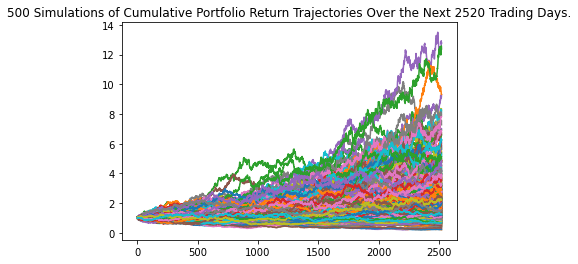

In [164]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
MC_sim_10_line_plot = MC_tenyear.plot_simulation()

MC_sim_10_line_plot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

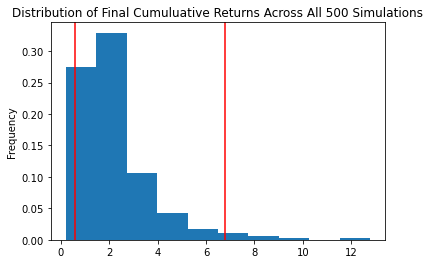

In [165]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_sim_10_dist_plot = MC_tenyear.plot_distribution()

MC_sim_10_dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

In [166]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
MC_10_summary_statistics = MC_tenyear.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
print(MC_10_summary_statistics)

count           500.000000
mean              2.249418
std               1.601610
min               0.203203
25%               1.191810
50%               1.855357
75%               2.676657
max              12.781101
95% CI Lower      0.578831
95% CI Upper      6.789821
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [167]:
# Print the current balance of the stock and bond portion of the members portfolio
print(f'This is the current balance of the stock and bond portion of the members portfolio: {total_portfolio.mean(): .2f}')


This is the current balance of the stock and bond portion of the members portfolio:  92528.15


In [170]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_10_summary_statistics[8] * 92528.15
ci_upper_thirty_cumulative_return = MC_10_summary_statistics[9] * 92528.15

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of $92,528.15 in the portfolio"
    f" over the next 10 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")



There is a 95% chance that an initial investment of $92,528.15 in the portfolio over the next 10 years will end within in the range of $ 53558.16 and $ 628249.60.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?